In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Load the dataset
df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [4]:
# Preprocessing the data: Drop any unnecessary columns (if needed)
# Assuming we focus on numerical columns for clustering
df_numeric = df.select_dtypes(include=[np.number])

# Handling missing values (if any)
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Determine the optimal number of clusters using the Elbow Method
inertia = []  # To store the sum of squared distances (inertia)
K = range(1, 11)  # Checking for 1 to 10 clusters, can adjust range if needed

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)  # Fit KMeans on the scaled data
    inertia.append(kmeans.inertia_)  # Append the inertia for each k

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [5]:
# Print the inertia values for each number of clusters
print("Number of clusters (k) vs Inertia:")
for i, val in enumerate(inertia, 1):
    print(f"k={i}, Inertia={val}")

Number of clusters (k) vs Inertia:
k=1, Inertia=25407.000000000025
k=2, Inertia=20090.887012173396
k=3, Inertia=16909.42705537905
k=4, Inertia=14818.012273279483
k=5, Inertia=13538.357526505564
k=6, Inertia=12554.607270059529
k=7, Inertia=11748.37373756924
k=8, Inertia=11067.918296898317
k=9, Inertia=10531.334835491683
k=10, Inertia=10053.886812436904


In [14]:
# Calculate and print percentage change between successive inertia values
print("\nPercentage change in inertia between successive cluster counts:")
percentage_changes = []  # To store percentage changes

for i in range(1, len(inertia)):
    change = ((inertia[i-1] - inertia[i]) / inertia[i-1]) * 100
    percentage_changes.append(change)
    print(f"k={i+1} vs k={i}: {change:.2f}% change")


Percentage change in inertia between successive cluster counts:
k=2 vs k=1: 20.92% change
k=3 vs k=2: 15.84% change
k=4 vs k=3: 12.37% change
k=5 vs k=4: 8.64% change
k=6 vs k=5: 7.27% change
k=7 vs k=6: 6.42% change
k=8 vs k=7: 5.79% change
k=9 vs k=8: 4.85% change
k=10 vs k=9: 4.53% change


In [15]:
# Determine the elbow point where the percentage change starts leveling off
# You can determine the "elbow" as the cluster with the biggest percentage drop
optimal_k = 1 + np.argmax(np.diff(percentage_changes)) + 1
print(f"\nThe optimal number of clusters based on the Elbow Method is: {optimal_k}")


The optimal number of clusters based on the Elbow Method is: 9


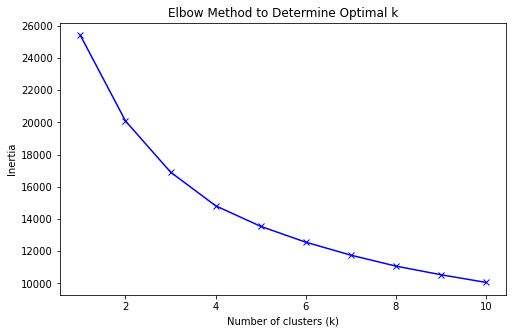

In [16]:
# Plot the Elbow Method graph (visualization)
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')  # Plot number of clusters vs. inertia
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()


In [17]:
# Fit the K-Means model with the optimal number of clusters (e.g., k=3 or k=4 based on the graph)
optimal_k = 4  # This value should be chosen based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

In [18]:
# Preview the clustered data
print(df.head())

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ... ADDRESSLINE2  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...          NaN   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          NaN   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          NaN   
3   8/25/2003 0:00  Shipped       3         8     2003  ...          NaN   
4  10/10/2003 0:00  Shipped       4        10     2003  ...          NaN   

            CITY STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME  \
0            NYC    NY      10022     U

In [19]:
# To show cluster centroids (optional)
print("Cluster Centers:", kmeans.cluster_centers_)

Cluster Centers: [[ 1.45077838e+00  1.84002074e-01 -1.05743987e-02 -1.16770793e-01
   1.05341831e-01 -1.12113883e+00 -1.11881261e+00  1.69382614e+00
  -1.36430064e-02]
 [-8.79452922e-02 -2.04942174e-01 -1.02193170e+00  6.76607343e-02
  -8.08020189e-01  6.74852743e-01  6.79762481e-01 -3.21883053e-01
  -8.53133572e-01]
 [-8.44055867e-01 -2.14711848e-02  1.13168816e-01 -1.02269988e-02
  -4.70650200e-02 -1.02419040e+00 -1.01980886e+00 -3.57568434e-01
  -1.26673121e-03]
 [-7.39254350e-02  8.08097880e-02  7.16791019e-01  1.36182647e-02
   6.04731788e-01  7.57193350e-01  7.49167787e-01 -3.54769682e-01
   6.67607982e-01]]
